In [16]:
from utils import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tqdm import tqdm

In [17]:
normalize = True
df = load_all_psd()

In [18]:
df

,label,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,...,16.0,16.5,17.0,17.5,18.0,18.5,19.0,19.5,emg,activity
0,W,192.752887,134.401064,43.003218,33.220566,30.907999,13.469839,27.637727,7.823482,7.380105,...,2.768317,4.779812,1.564146,2.634213,1.856222,1.727733,1.239977,1.734526,3.449357,0.601001
1,W,111.060966,87.878601,19.383622,35.571424,15.133619,5.236654,28.628118,12.436369,7.559088,...,1.110496,1.279746,2.699855,5.881391,3.445426,1.833154,2.045278,2.075398,-1.590530,0.901006
2,W,724.504982,326.847745,87.851463,63.663405,26.600715,31.652538,18.410224,25.087809,15.173196,...,0.618833,3.942031,4.126661,2.886137,2.011309,1.888994,2.131388,1.898780,0.232975,0.000992
3,W,349.524705,43.137827,67.022832,35.122532,16.343863,18.131009,10.421862,17.626150,16.140911,...,1.521792,2.344789,1.394588,3.953405,1.127274,1.282776,2.458646,1.939278,-4.194645,0.100994
4,W,341.222340,26.088461,76.989717,45.810140,33.207256,44.153609,42.293979,30.815297,49.429075,...,1.724783,1.345229,1.854978,5.045514,3.662850,1.938447,1.542634,1.935021,9.462563,0.601001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276474,S,294.368404,248.887175,238.134975,776.158871,242.374923,226.216679,232.214295,52.970406,104.266954,...,45.210264,17.443057,18.730876,9.912405,15.459230,27.095737,12.581725,16.990442,0.315816,0.000992
276475,W,371.941850,494.339464,219.457377,559.866653,249.207177,235.430751,252.910544,132.270838,143.155979,...,21.225634,12.248432,12.614610,18.145443,7.659300,6.771665,8.783063,4.144186,2.736083,0.601001
276476,W,134.858418,44.086842,107.247223,38.628215,64.281650,99.987897,80.161733,43.112348,24.260366,...,4.742233,6.797717,3.841395,3.216308,3.607772,5.116385,4.243592,4.070556,-4.266726,0.100994
276477,W,122.200010,31.703554,112.006338,19.092743,63.785461,35.175015,127.107691,111.513279,36.147148,...,4.908741,8.683039,2.747926,3.156484,5.964211,2.958860,2.889740,2.706141,-9.571739,0.500801


In [19]:
X = df.drop('label',axis=1)
y = df['label']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,shuffle=True,stratify=y)

In [8]:
# TODO : only want if PSD actually normally distributed
if normalize:
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

In [9]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

0.7415493174828128
0.8558248914616498


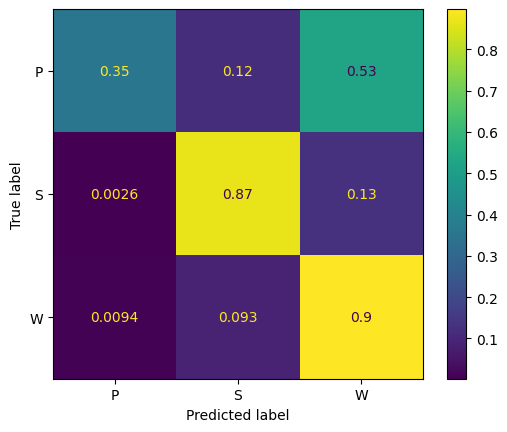

In [27]:
y_pred = clf.predict(X_test)
cm = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred,normalize='true'),display_labels=['P','S','W'])
cm.plot()
# harmonic mean between precision and recall
# 2* (precision * recall) / (precision + recall)
print(f1_score(y_pred=y_pred,y_true=y_test,average='macro'))
print(clf.score(X_test,y_test))